In [1]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Explore dataset

In [2]:
# generate dataframe to explore
traindf = pd.read_csv('train.csv')
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(traindf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# how many samples per neighborhood?
print(traindf['Neighborhood'].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

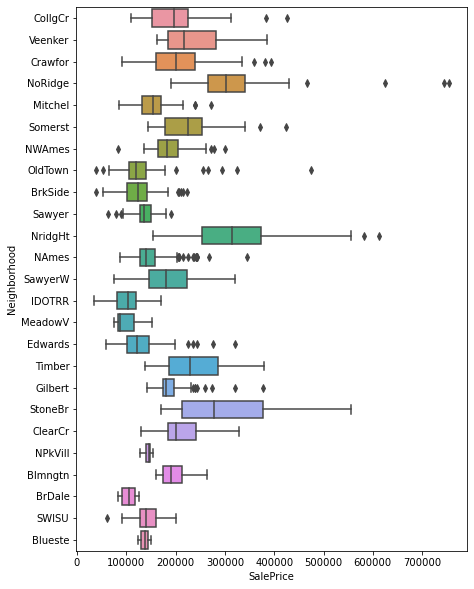

In [5]:
# describe sale price for each neighborhood
#traindf.groupby('Neighborhood').SalePrice.describe()
fig = plt.subplots(figsize=(7,10))
sns.boxplot(x='SalePrice', y='Neighborhood', data=traindf, orient='h')

In [6]:
# take a look at highest sale prices
sp = traindf.loc[:,'SalePrice'] >= 600000
traindf.loc[sp,['SalePrice','Neighborhood','LotArea','GrLivArea','GarageArea','YearRemodAdd','BldgType','SaleCondition']]

,SalePrice,Neighborhood,LotArea,GrLivArea,GarageArea,YearRemodAdd,BldgType,SaleCondition
691,755000,NoRidge,21535,4316,832,1995,1Fam,Normal
898,611657,NridgHt,12919,2364,820,2010,1Fam,Partial
1169,625000,NoRidge,35760,3627,807,1996,1Fam,Normal
1182,745000,NoRidge,15623,4476,813,1996,1Fam,Abnorml


Text(0.5, 1.0, 'SalePrice vs GarageArea')

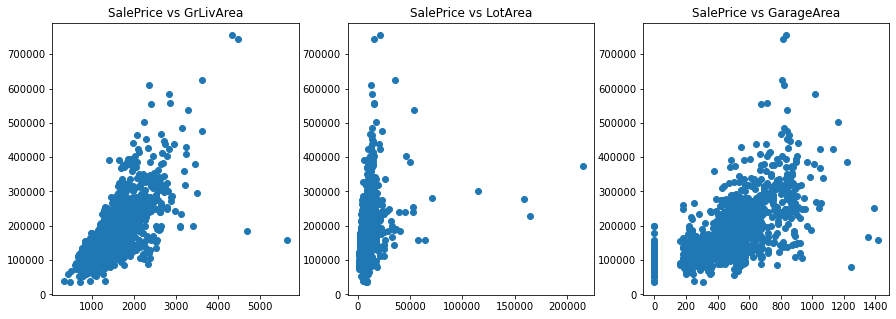

In [7]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].plot(traindf.GrLivArea, traindf.SalePrice,'o')
axs[0].set_title('SalePrice vs GrLivArea')

axs[1].plot(traindf.LotArea, traindf.SalePrice,'o')
axs[1].set_title('SalePrice vs LotArea')

axs[2].plot(traindf.GarageArea, traindf.SalePrice,'o')
axs[2].set_title('SalePrice vs GarageArea')

In [8]:
# samples with 4000+ GrLivArea
gla = traindf.loc[:,'GrLivArea'] >= 4000
traindf.loc[gla,['SalePrice','Neighborhood','LotArea','GrLivArea','GarageArea','YearRemodAdd','BldgType','SaleCondition']]

# both unusually high and low prices for size

,SalePrice,Neighborhood,LotArea,GrLivArea,GarageArea,YearRemodAdd,BldgType,SaleCondition
523,184750,Edwards,40094,4676,884,2008,1Fam,Partial
691,755000,NoRidge,21535,4316,832,1995,1Fam,Normal
1182,745000,NoRidge,15623,4476,813,1996,1Fam,Abnorml
1298,160000,Edwards,63887,5642,1418,2008,1Fam,Partial


In [9]:
# samples with lotarea > 100000
la = traindf.loc[:,'LotArea'] >= 100000
traindf.loc[la,['SalePrice','Neighborhood','LotArea','GrLivArea','GarageArea','YearRemodAdd','BldgType','SaleCondition']]

,SalePrice,Neighborhood,LotArea,GrLivArea,GarageArea,YearRemodAdd,BldgType,SaleCondition
249,277000,ClearCr,159000,2144,389,2006,1Fam,Normal
313,375000,Timber,215245,2036,513,1965,1Fam,Normal
335,228950,Timber,164660,1786,529,1965,2fmCon,Normal
706,302000,ClearCr,115149,1824,739,2002,1Fam,Normal


In [10]:
# samples with garagearea > 1200
ga = traindf.loc[:,'GarageArea'] >= 1200
traindf.loc[ga,['SalePrice','Neighborhood','LotArea','GrLivArea','GarageArea','YearRemodAdd','BldgType','SaleCondition']]

,SalePrice,Neighborhood,LotArea,GrLivArea,GarageArea,YearRemodAdd,BldgType,SaleCondition
581,253293,NridgHt,12704,2042,1390,2009,1Fam,Partial
825,385000,NridgHt,14803,2084,1220,2008,1Fam,Partial
1061,81000,IDOTRR,18000,894,1248,1950,1Fam,Normal
1190,168000,Mitchel,32463,1622,1356,1975,2fmCon,Normal
1298,160000,Edwards,63887,5642,1418,2008,1Fam,Partial


<AxesSubplot:xlabel='GarageArea', ylabel='Neighborhood'>

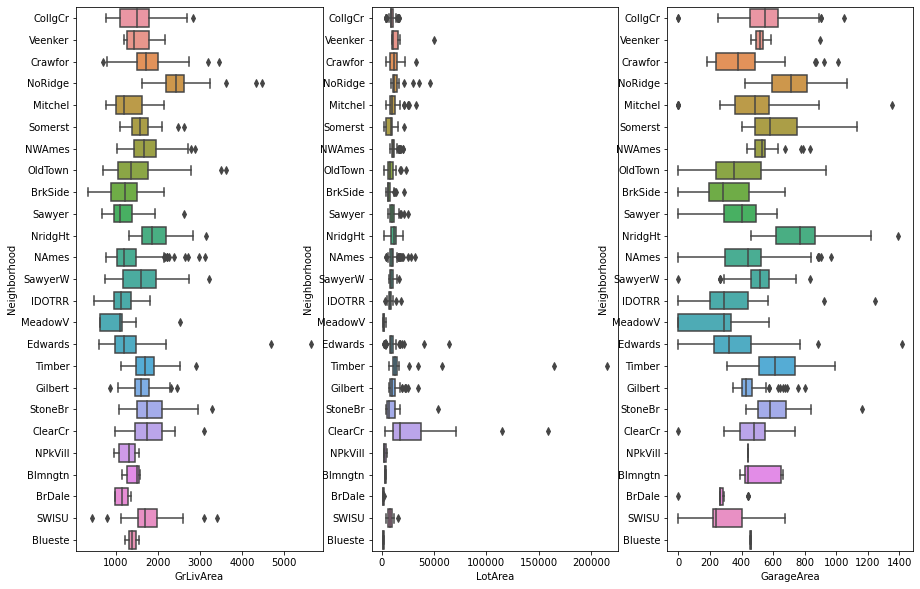

In [11]:
# distribution by neighborhood
#traindf.groupby('Neighborhood')[['GrLivArea','LotArea']].describe()
fig, axs = plt.subplots(1,3, figsize=(15,10))
#fig.tight_layout()
sns.boxplot(x='GrLivArea', y='Neighborhood', data=traindf, orient='h', ax=axs[0])
sns.boxplot(x='LotArea', y='Neighborhood', data=traindf, orient='h', ax=axs[1])
sns.boxplot(x='GarageArea', y='Neighborhood', data=traindf, orient='h', ax=axs[2])

Text(0.5, 1.0, 'log(Sale Price)')

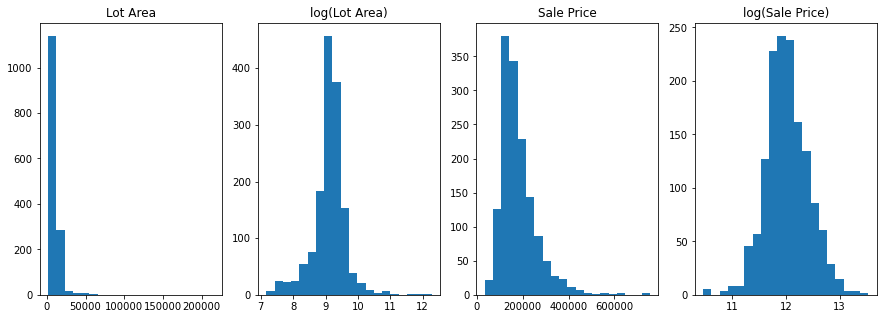

In [12]:
fig, axs = plt.subplots(1,4, figsize=(15,5))
axs[0].hist(traindf.LotArea, bins=20)
axs[0].set_title('Lot Area')

axs[1].hist(np.log(traindf.LotArea), bins=20)
axs[1].set_title('log(Lot Area)')

axs[2].hist(traindf.SalePrice, bins=20)
axs[2].set_title('Sale Price')

axs[3].hist(np.log(traindf.SalePrice), bins=20)
axs[3].set_title('log(Sale Price)')

In [13]:
# explore missing values
countna = traindf.isna().sum()
print(countna[countna>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

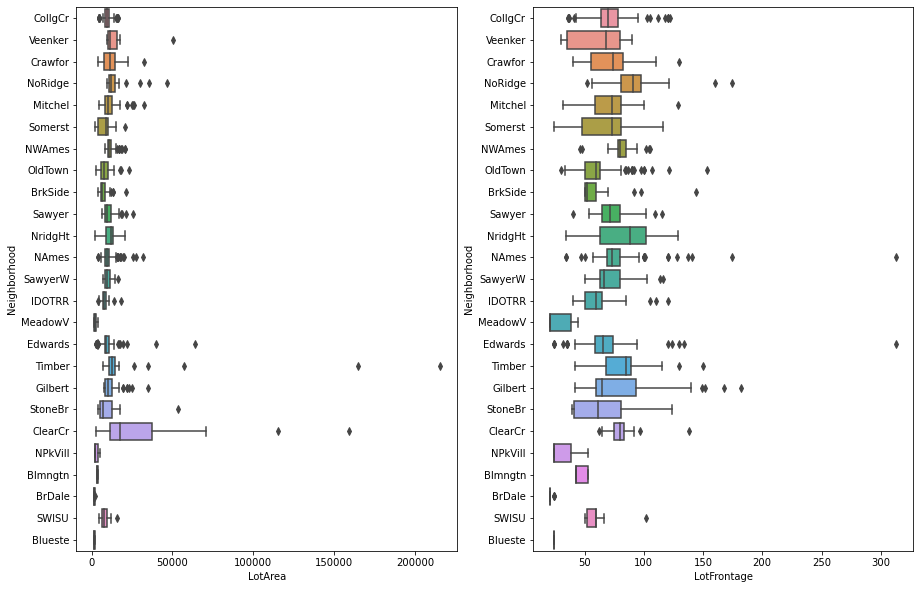

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15,10))
sns.boxplot(x='LotArea', y='Neighborhood', data=traindf, orient='h', ax=axs[0])
sns.boxplot(x='LotFrontage', y='Neighborhood', data=traindf, orient='h', ax=axs[1])

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

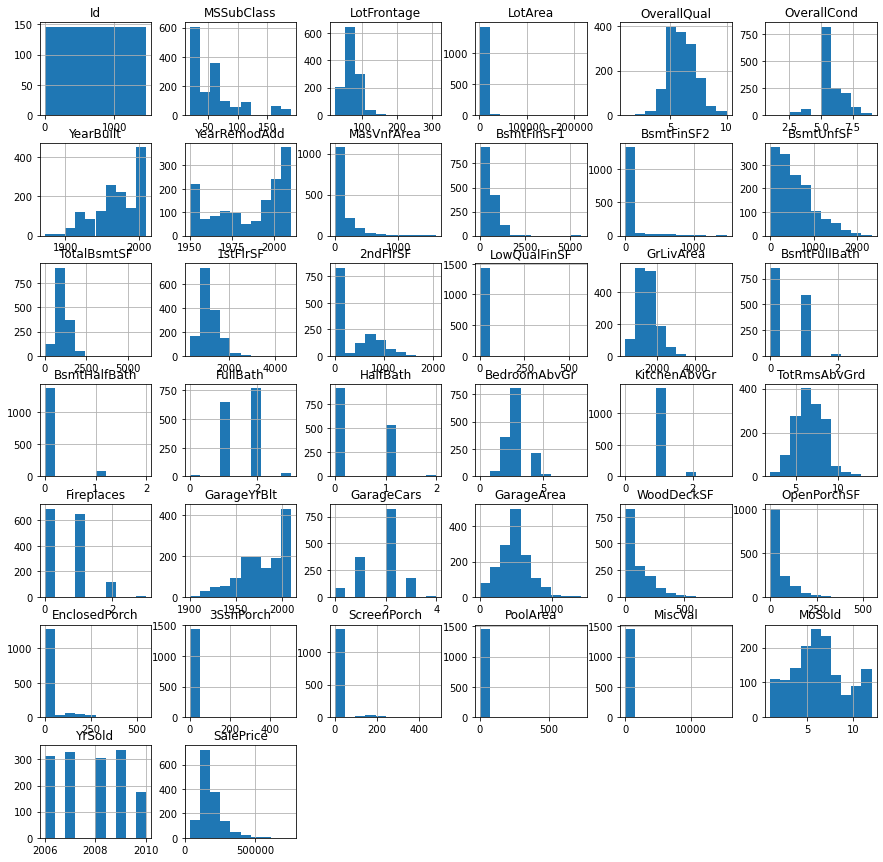

In [15]:
# look at distribution of numerical features
traindf.hist(figsize=(15,15))